In [2]:
cd /data/store01/data_dirs/students/ucfafyi/Sentinel

/data/store01/data_dirs/students/ucfafyi/Sentinel


In [24]:
import sys
sys.path.insert(0, 'python')
import pandas as pd
import numpy as np
import pylab as plt
from scipy import interpolate
from nicer_plot import *
%matplotlib inline 
plot_config()

/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [20]:
pas = ['Date(dd-mm-yyyy)', 'Time(hh:mm:ss)', 'Julian_Day', 'AOT_1640', 
       'AOT_1020', 'AOT_870', 'AOT_675', 'AOT_667', 'AOT_555', 'AOT_551', 'AOT_532', 
       'AOT_531', 'AOT_500', 'AOT_490', 'AOT_443', 'AOT_440', 'AOT_412', 'AOT_380', 'AOT_340', 'Water(cm)']
df = pd.read_csv('160201_160210_Birdsville.dubovik', skiprows=3, na_values=["N/A"])
date = df[pas][10:16]
aero = np.array(date.AOT_1640),np.array(date.AOT_1020),np.array(date.AOT_870),np.array(date.AOT_675),np.array(date.AOT_500),np.array(date.AOT_440),np.array(date.AOT_380),np.array(date.AOT_340)
wv = [1640, 1020,870, 675, 500, 440, 380, 340]
aero = np.array(aero).T
date

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm)
10,05:02:2016,05:58:46,36.249144,0.041373,0.042334,0.052011,0.063958,NaN,NaN,NaN,NaN,NaN,0.071710,NaN,NaN,0.082973,NaN,0.103529,0.100552,2.076429
11,05:02:2016,08:24:39,36.350451,0.042956,0.046899,0.051539,0.057613,NaN,NaN,NaN,NaN,NaN,0.068778,NaN,NaN,0.073407,NaN,0.087425,0.090138,2.006438
12,05:02:2016,21:33:32,36.898287,0.028074,0.027165,0.032422,0.039044,NaN,NaN,NaN,NaN,NaN,0.055704,NaN,NaN,0.055614,NaN,0.068275,0.066913,2.881002
13,05:02:2016,21:56:07,36.913970,0.029019,0.027150,0.033112,0.040382,NaN,NaN,NaN,NaN,NaN,0.057209,NaN,NaN,0.056690,NaN,0.070363,0.067750,2.942514
14,05:02:2016,23:10:04,36.965324,0.032372,0.028524,0.037152,0.047758,NaN,NaN,NaN,NaN,NaN,0.066756,NaN,NaN,0.064841,NaN,0.080978,0.074604,3.091355
15,05:02:2016,23:58:51,36.999201,0.034944,0.031868,0.041672,0.054406,NaN,NaN,NaN,NaN,NaN,0.071205,NaN,NaN,0.074671,NaN,0.092779,0.086925,3.316232


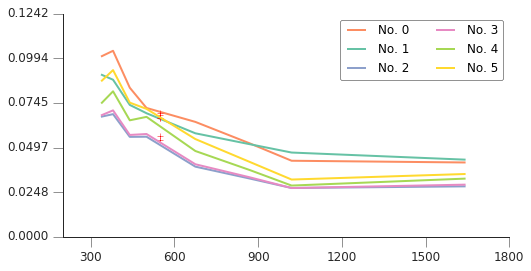

In [25]:
aot550 = []
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for i,j in enumerate(aero[:,::-1]):
    ax.plot(wv[::-1], j, label = 'No. %s'%i)
    f = interpolate.interp1d(wv[::-1],j, kind='cubic')
    xnew = 550
    ynew = f(xnew)
    aot550.append(ynew)
    plt.plot(550, ynew, 'r+')
pretty_axes(ax)  
ax.set_yticks(np.linspace(0, 1.2*np.max(aero), 6))
plt.legend(ncol=2)

In [26]:
aot550

[array(0.06793831923818089),
 array(0.0661950679219985),
 array(0.05413720715070781),
 array(0.05597613610877274),
 array(0.0662249395935082),
 array(0.06897576164808863)]